# U.S. Medical Insurance Costs

Для этого проекта будет исследован и проанализирован набор данных, содержащий информацию о людях и стоимости их страховки. Основная цель - поиск и изучение того, как определенные данные пациентов могут повлиять на стоимость страховки для них.

Импортируем библиотеки pandas, matplotlib, seaborn

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Импортируем csv-файл и получим саммари набора данных

In [61]:
df = pd.read_csv("insurance.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Мы имеем 1338 строк и 7 стоблцов. Все dtype соответствуют стоблцам, поэтому мы не будем ничего менять. 

Проверим есть ли в данных пропущенные или дублированным строки:

In [62]:
print(df.isna().sum())
print("Кол-во дубликатов: ",df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop = True)
print("Кол-во дубликатов: ",df.duplicated().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Кол-во дубликатов:  1
Кол-во дубликатов:  0


Пропущенных строк нет, а дубликаты были удалены. Теперь мы можем приступить к анализу

Для начала просмотрим базовый анализ:

In [63]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


Начнем с анализа данных по регионам.

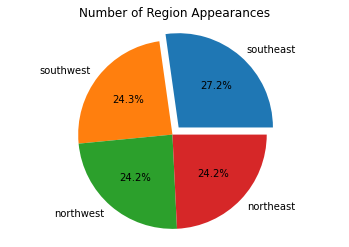

In [64]:
regions = ['southeast', 'southwest', 'northwest', 'northeast']
plt.pie(df.region.value_counts(), labels=regions, autopct='%1.1f%%', explode=(0.10, 0, 0, 0))
plt.title('Number of Region Appearances')
plt.axis('equal')
plt.show()

Здесь мы можем увидеть как области представлены в виде круговой диаграммы. Глядя на диаграмму и данные, мы видим, что юго-восточный (southeast) регион составляет наибольший процент набора данных.

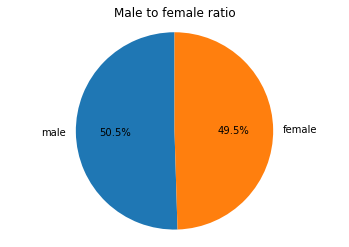

In [65]:
sex = ['male', 'female']
plt.pie(df.sex.value_counts(), labels=sex, autopct='%1.1f%%', startangle=90)
plt.title('Male to female ratio')
plt.axis('equal')
plt.show()

Проведя базовый анализ, мы видим, что наши данные довольно сбалансированы.

Затем мы начнем смотреть на возраст и на то, как он соотносится с остальными нашими данными.

<AxesSubplot:>

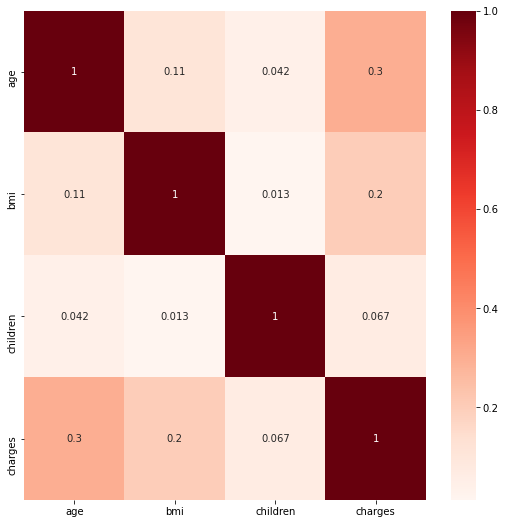

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

Глядя на нашу корреляционную матрицу, мы видим, что возраст имеет самую высокую корреляцию по сравнению с другими значениями.

Давайте еще немного проанализируем возраст отношений с остальными нашими данными.

<AxesSubplot:xlabel='age', ylabel='charges'>

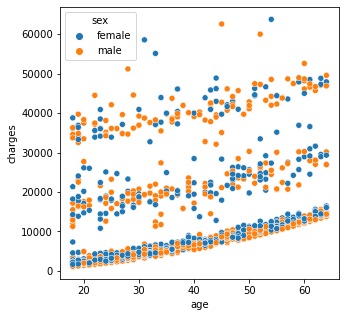

In [67]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='age', y='charges', data=df, hue='sex')

Эта точечная диаграмма дает нам визуальное представление о положительной взаимосвязи между возрастом и стоимостью страховки.

Наконец, сравним стоимость страховки для курящих и некурящих.

In [68]:
smoker_averages = df.groupby(['smoker']).mean()
print(smoker_averages)

              age        bmi  children       charges
smoker                                              
no      39.404516  30.651853  1.091251   8440.660307
yes     38.514599  30.708449  1.113139  32050.231832


<AxesSubplot:title={'center':'Smoker VS. Non-Smoker Charges by Age'}, xlabel='Age', ylabel='Insurance Cost'>

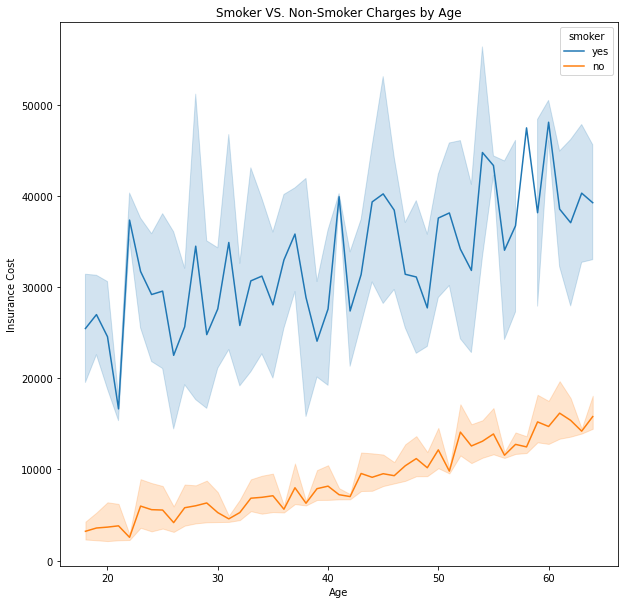

In [69]:
plt.figure(figsize=(10, 10))
plt.title('Smoker VS. Non-Smoker Charges by Age')
plt.ylabel('Insurance Cost')
plt.xlabel('Age')
sns.lineplot(x='age', y='charges', data=df, hue='smoker')

Здесь мы видим, что в среднем курильщики платят почти в 4 раза больше, чем некурящие, когда речь идет о страховых расходах. Те, у кого самые высокие страховые расходы, должны быть курильщиками старшего возраста.